In [4]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_temperature_pure_python(duration_min: int,
                              initial_temp: float,
                              ambient_temp: float,
                              wind_speed: float,
                              intensity: float) -> list[float]:
    """
    Simule l'évolution de la température du câble minute par minute.
    Affiche une barre de progression avec estimation du temps restant.

    :param duration_min: Durée de la simulation (minutes)
    :param initial_temp: Température initiale du câble (\u00b0C)
    :param ambient_temp: Température ambiante (\u00b0C)
    :param wind_speed: Vitesse du vent (m/s)
    :param intensity: Intensité électrique (A)
    :return: Liste des températures du câble à chaque minute (longueur duration_min + 1)
    """
    temperatures = []
    current_temp = initial_temp

    cooling_factor = (-(wind_speed ** 2 / 1600 * 0.4) - 0.1)
    heating_term = (intensity ** 1.4 / 73785) * 130

    seconds_per_minute = 60
    time_step = 1.0
    thermal_inertia = 0.01

    for _ in range(duration_min):
        for _ in range(seconds_per_minute):
            delta = cooling_factor * (current_temp - (ambient_temp + heating_term))
            current_temp += delta * thermal_inertia
        temperatures.append(round(current_temp, 1))

    return temperatures


[codecarbon WARNING @ 00:31:05] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 00:31:05] [setup] RAM Tracking...
[codecarbon INFO @ 00:31:05] [setup] CPU Tracking...
[codecarbon WARNING @ 00:31:06] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Windows OS detected: Please install Intel Power Gadget to measure CPU

[codecarbon INFO @ 00:31:06] CPU Model on constant consumption mode: 11th Gen Intel(R) Core(TM) i7-11800H @ 2.30GHz
[codecarbon WARNING @ 00:31:06] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 00:31:06] [setup] GPU Tracking...
[codecarbon INFO @ 00:31:06] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 00:31:08] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation model
                CPU Tracking Method: global constant
                GPU Tracking Method: pynvml
            
[codecarbon INFO @ 00:31:08] >>> Track

{'cpu_usage_kWh': 4.782400000010511e-07, 'gpu_usage_kWh': 0.0, 'ram_energy_kWh': 4.929722222218263e-09, 'energy_consumed': 4.831697222232694e-07, 'exec_time_in_seconds': 0.00012826919555664062, 'result': [25.0, 26.3, 27.6, 28.8, 29.9, 31.0, 32.0, 32.9, 33.8, 34.6, 35.4, 36.2, 36.8, 37.5, 38.1, 38.7, 39.2, 39.7, 40.2, 40.7, 41.1, 41.5, 41.9, 42.2, 42.6, 42.9, 43.2, 43.5, 43.7, 44.0, 44.2]}


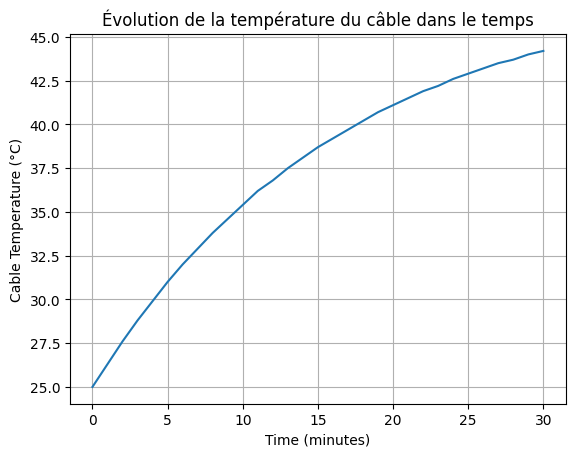

In [8]:
from codecarbon import EmissionsTracker
import time

initial_temp = 25.0
ambient_temp = 20.0
wind_speed = 2.0
intensity = 1000
duration_minutes = 30

times = list(range(duration_minutes + 1))
temperatures = [initial_temp]

tracker = EmissionsTracker()
tracker.start()
start_time = time.time()

temperatures.extend(simulate_temperature_pure_python(duration_minutes, initial_temp, ambient_temp, wind_speed, intensity))

exec_time = time.time() - start_time
tracker.stop()

result = {
    'cpu_usage_kWh': tracker.final_emissions_data.cpu_energy,
    'gpu_usage_kWh': tracker.final_emissions_data.gpu_energy,
    'ram_energy_kWh': tracker.final_emissions_data.ram_energy,
    'energy_consumed': tracker.final_emissions_data.energy_consumed,
    'exec_time_in_seconds': exec_time,
    'result': temperatures
}
print(result)

plt.figure()
plt.plot(times, temperatures)
plt.xlabel("Time (minutes)")
plt.ylabel("Cable Temperature (°C)")
plt.title("Évolution de la température du câble dans le temps")
plt.grid(True)
plt.show()


scipy odeint


In [9]:
import numpy as np
from scipy.integrate import odeint

def simulate_temperature_odeint(duration_min: int,
                                initial_temp: float,
                                ambient_temp: float,
                                wind_speed: float,
                                intensity: float) -> list[float]:
    """
    Simule l'évolution de la température du câble minute par minute à l'aide de scipy.odeint.

    :param duration_min: Durée de la simulation (minutes)
    :param initial_temp: Température initiale du câble (°C)
    :param ambient_temp: Température ambiante (°C)
    :param wind_speed: Vitesse du vent (m/s)
    :param intensity: Intensité électrique (A)
    :return: Liste des températures du câble à chaque minute
    """

    cooling_factor = (-(wind_speed ** 2 / 1600 * 0.4) - 0.1)
    heating_term = (intensity ** 1.4 / 73785) * 130
    thermal_inertia = 0.01

    def dT_dt(T, t):
        return cooling_factor * (T - (ambient_temp + heating_term)) * thermal_inertia

    total_seconds = duration_min * 60
    t = np.linspace(0, total_seconds, total_seconds + 1)  # 1 point par seconde

    sol = odeint(dT_dt, initial_temp, t).flatten()

    temps_par_minute = sol[::60]
    return list(np.round(temps_par_minute, 1))


[codecarbon WARNING @ 00:32:00] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 00:32:00] [setup] RAM Tracking...
[codecarbon INFO @ 00:32:00] [setup] CPU Tracking...
[codecarbon WARNING @ 00:32:02] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Windows OS detected: Please install Intel Power Gadget to measure CPU

[codecarbon INFO @ 00:32:02] CPU Model on constant consumption mode: 11th Gen Intel(R) Core(TM) i7-11800H @ 2.30GHz
[codecarbon WARNING @ 00:32:02] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 00:32:02] [setup] GPU Tracking...
[codecarbon INFO @ 00:32:02] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 00:32:03] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation model
                CPU Tracking Method: global constant
                GPU Tracking Method: pynvml
            
[codecarbon INFO @ 00:32:03] >>> Track

{'cpu_usage_kWh': 5.491099999971993e-07, 'gpu_usage_kWh': 0.0, 'ram_energy_kWh': 6.282777777736708e-09, 'energy_consumed': 5.55392777774936e-07, 'exec_time_in_seconds': 0.00040268898010253906, 'result': [np.float64(25.0), np.float64(26.3), np.float64(27.6), np.float64(28.8), np.float64(29.9), np.float64(31.0), np.float64(32.0), np.float64(32.9), np.float64(33.8), np.float64(34.6), np.float64(35.4), np.float64(36.2), np.float64(36.8), np.float64(37.5), np.float64(38.1), np.float64(38.7), np.float64(39.2), np.float64(39.7), np.float64(40.2), np.float64(40.7), np.float64(41.1), np.float64(41.5), np.float64(41.9), np.float64(42.2), np.float64(42.6), np.float64(42.9), np.float64(43.2), np.float64(43.5), np.float64(43.7), np.float64(44.0), np.float64(44.2)]}


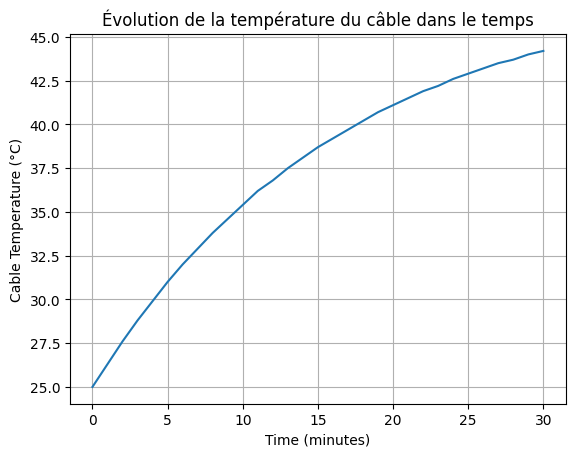

In [11]:
from codecarbon import EmissionsTracker
import time

initial_temp = 25.0
ambient_temp = 20.0
wind_speed = 2.0
intensity = 1000
duration_minutes = 30

times = list(range(duration_minutes + 1))
temperatures = []

tracker = EmissionsTracker()
tracker.start()
start_time = time.time()

temperatures.extend(simulate_temperature_odeint(duration_minutes, initial_temp, ambient_temp, wind_speed, intensity))

exec_time = time.time() - start_time
tracker.stop()

result = {
    'cpu_usage_kWh': tracker.final_emissions_data.cpu_energy,
    'gpu_usage_kWh': tracker.final_emissions_data.gpu_energy,
    'ram_energy_kWh': tracker.final_emissions_data.ram_energy,
    'energy_consumed': tracker.final_emissions_data.energy_consumed,
    'exec_time_in_seconds': exec_time,
    'result': temperatures
}
print(result)

plt.figure()
plt.plot(times, temperatures)
plt.xlabel("Time (minutes)")
plt.ylabel("Cable Temperature (°C)")
plt.title("Évolution de la température du câble dans le temps")
plt.grid(True)
plt.show()

JIT NUMBA

In [12]:
from numba import njit


@njit
def simulate_temperature_jit_numba(duration_min: int,
                              initial_temp: float,
                              ambient_temp: float,
                              wind_speed: float,
                              intensity: float) -> list[float]:
    """
    Simule l'évolution de la température du câble minute par minute.
    Affiche une barre de progression avec estimation du temps restant.

    :param duration_min: Durée de la simulation (minutes)
    :param initial_temp: Température initiale du câble (\u00b0C)
    :param ambient_temp: Température ambiante (\u00b0C)
    :param wind_speed: Vitesse du vent (m/s)
    :param intensity: Intensité électrique (A)
    :return: Liste des températures du câble à chaque minute (longueur duration_min + 1)
    """
    temperatures = []
    current_temp = initial_temp

    cooling_factor = (-(wind_speed ** 2 / 1600 * 0.4) - 0.1)
    heating_term = (intensity ** 1.4 / 73785) * 130

    seconds_per_minute = 60
    time_step = 1.0
    thermal_inertia = 0.01

    for _ in range(duration_min):
        for _ in range(seconds_per_minute):
            delta = cooling_factor * (current_temp - (ambient_temp + heating_term))
            current_temp += delta * thermal_inertia
        temperatures.append(round(current_temp, 1))

    return temperatures

[codecarbon WARNING @ 00:39:38] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 00:39:38] [setup] RAM Tracking...
[codecarbon INFO @ 00:39:38] [setup] CPU Tracking...
[codecarbon WARNING @ 00:39:40] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Windows OS detected: Please install Intel Power Gadget to measure CPU

[codecarbon INFO @ 00:39:40] CPU Model on constant consumption mode: 11th Gen Intel(R) Core(TM) i7-11800H @ 2.30GHz
[codecarbon WARNING @ 00:39:40] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 00:39:40] [setup] GPU Tracking...
[codecarbon INFO @ 00:39:40] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 00:39:41] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation model
                CPU Tracking Method: global constant
                GPU Tracking Method: pynvml
            
[codecarbon INFO @ 00:39:41] >>> Track

{'cpu_usage_kWh': 0.00012475289999999857, 'gpu_usage_kWh': 1.0278897111999934e-05, 'ram_energy_kWh': 3.454959444444386e-06, 'energy_consumed': 0.0001384867565564429, 'exec_time_in_seconds': 1.2419960498809814, 'result': [25.0, 26.3, 27.6, 28.8, 29.9, 31.0, 32.0, 32.9, 33.8, 34.6, 35.4, 36.2, 36.8, 37.5, 38.1, 38.7, 39.2, 39.7, 40.2, 40.7, 41.1, 41.5, 41.9, 42.2, 42.6, 42.9, 43.2, 43.5, 43.7, 44.0, 44.2]}


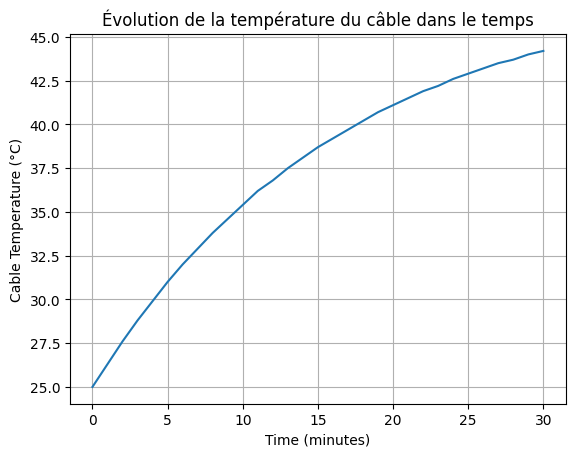

In [13]:
from codecarbon import EmissionsTracker
import time

initial_temp = 25.0
ambient_temp = 20.0
wind_speed = 2.0
intensity = 1000
duration_minutes = 30

times = list(range(duration_minutes+ 1))
temperatures = [initial_temp]

tracker = EmissionsTracker()
tracker.start()
start_time = time.time()

temperatures.extend(simulate_temperature_jit_numba(duration_minutes, initial_temp, ambient_temp, wind_speed, intensity))

exec_time = time.time() - start_time
tracker.stop()

result = {
    'cpu_usage_kWh': tracker.final_emissions_data.cpu_energy,
    'gpu_usage_kWh': tracker.final_emissions_data.gpu_energy,
    'ram_energy_kWh': tracker.final_emissions_data.ram_energy,
    'energy_consumed': tracker.final_emissions_data.energy_consumed,
    'exec_time_in_seconds': exec_time,
    'result': temperatures
}
print(result)

plt.figure()
plt.plot(times, temperatures)
plt.xlabel("Time (minutes)")
plt.ylabel("Cable Temperature (°C)")
plt.title("Évolution de la température du câble dans le temps")
plt.grid(True)
plt.show()

CYTHON
Disponible dans le code

Faire : `cd .\backend\app\services\optimized`

Puis : `python .\setup.py build_ext --inplace`

Puis : `python .\test_opti.py`



Comparatif 1\*30 mins ou 30\*1 mins

[codecarbon WARNING @ 01:07:45] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 01:07:45] [setup] RAM Tracking...
[codecarbon INFO @ 01:07:45] [setup] CPU Tracking...
[codecarbon WARNING @ 01:07:47] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Windows OS detected: Please install Intel Power Gadget to measure CPU

[codecarbon INFO @ 01:07:47] CPU Model on constant consumption mode: 11th Gen Intel(R) Core(TM) i7-11800H @ 2.30GHz
[codecarbon WARNING @ 01:07:47] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 01:07:47] [setup] GPU Tracking...
[codecarbon INFO @ 01:07:47] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 01:07:48] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation model
                CPU Tracking Method: global constant
                GPU Tracking Method: pynvml
            
[codecarbon INFO @ 01:07:48] >>> Track

{'cpu_usage_kWh': 5.838899999616842e-07, 'gpu_usage_kWh': 0.0, 'ram_energy_kWh': 5.091944443494059e-09, 'energy_consumed': 5.889819444051782e-07, 'exec_time_in_seconds': 0.0002186298370361328, 'result': [25.0, 26.3, 27.6, 28.8, 29.9, 31.0, 32.0, 32.9, 33.8, 34.6, 35.4, 36.1, 36.8, 37.5, 38.1, 38.7, 39.2, 39.7, 40.2, 40.7, 41.1, 41.5, 41.9, 42.3, 42.6, 42.9, 43.2, 43.5, 43.8, 44.0, 44.2]}


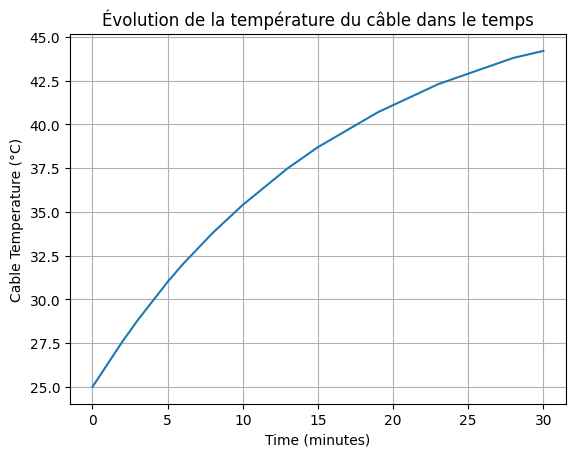

In [8]:
# 30 * 1 min
import time
from codecarbon import EmissionsTracker

initial_temp = 25.0
ambient_temp = 20.0
wind_speed = 2.0
intensity = 1000
duration_minutes = 30

tracker = EmissionsTracker()
tracker.start()
start_time = time.time()

times = list(range(duration_minutes+ 1))
temps = [initial_temp]
current = initial_temp
for _ in range(30):
    next_temp = simulate_temperature_pure_python(1, current, ambient_temp, wind_speed, intensity)[-1]
    temps.append(next_temp)
    current = next_temp

exec_time = time.time() - start_time
tracker.stop()

result = {
    'cpu_usage_kWh': tracker.final_emissions_data.cpu_energy,
    'gpu_usage_kWh': tracker.final_emissions_data.gpu_energy,
    'ram_energy_kWh': tracker.final_emissions_data.ram_energy,
    'energy_consumed': tracker.final_emissions_data.energy_consumed,
    'exec_time_in_seconds': exec_time,
    'result': temps
}
print(result)

plt.figure()
plt.plot(times, temps)
plt.xlabel("Time (minutes)")
plt.ylabel("Cable Temperature (°C)")
plt.title("Évolution de la température du câble dans le temps")
plt.grid(True)
plt.show()

[codecarbon WARNING @ 01:13:15] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 01:13:15] [setup] RAM Tracking...
[codecarbon INFO @ 01:13:15] [setup] CPU Tracking...
[codecarbon WARNING @ 01:13:16] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Windows OS detected: Please install Intel Power Gadget to measure CPU

[codecarbon INFO @ 01:13:16] CPU Model on constant consumption mode: 11th Gen Intel(R) Core(TM) i7-11800H @ 2.30GHz
[codecarbon WARNING @ 01:13:16] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 01:13:16] [setup] GPU Tracking...
[codecarbon INFO @ 01:13:16] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 01:13:17] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation model
                CPU Tracking Method: global constant
                GPU Tracking Method: pynvml
            
[codecarbon INFO @ 01:13:17] >>> Track

{'cpu_usage_kWh': 8.361400000012509e-07, 'gpu_usage_kWh': 0.0, 'ram_energy_kWh': 1.2773333332916082e-08, 'energy_consumed': 8.48913333334167e-07, 'exec_time_in_seconds': 0.00013756752014160156, 'result': [25.0, 26.3, 27.6, 28.8, 29.9, 31.0, 32.0, 32.9, 33.8, 34.6, 35.4, 36.2, 36.8, 37.5, 38.1, 38.7, 39.2, 39.7, 40.2, 40.7, 41.1, 41.5, 41.9, 42.2, 42.6, 42.9, 43.2, 43.5, 43.7, 44.0, 44.2]}


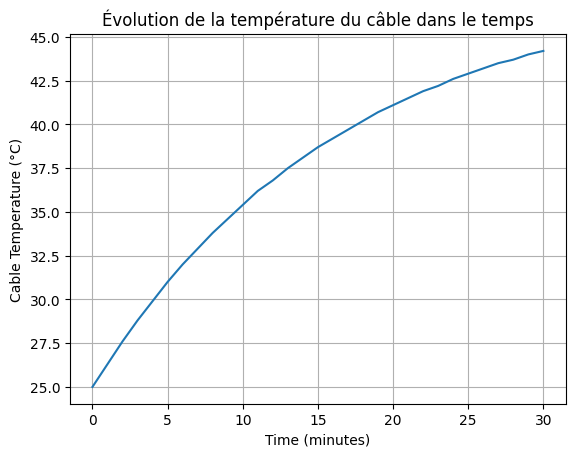

In [10]:

from codecarbon import EmissionsTracker
import time

initial_temp = 25.0
ambient_temp = 20.0
wind_speed = 2.0
intensity = 1000

times = list(range(duration_minutes + 1))
temperatures = [initial_temp]

tracker = EmissionsTracker()
tracker.start()
start_time = time.time()

temperatures.extend(simulate_temperature_pure_python(30, initial_temp, ambient_temp, wind_speed, intensity))

exec_time = time.time() - start_time
tracker.stop()

result = {
    'cpu_usage_kWh': tracker.final_emissions_data.cpu_energy,
    'gpu_usage_kWh': tracker.final_emissions_data.gpu_energy,
    'ram_energy_kWh': tracker.final_emissions_data.ram_energy,
    'energy_consumed': tracker.final_emissions_data.energy_consumed,
    'exec_time_in_seconds': exec_time,
    'result': temperatures
}
print(result)

plt.figure()
plt.plot(times, temperatures)
plt.xlabel("Time (minutes)")
plt.ylabel("Cable Temperature (°C)")
plt.title("Évolution de la température du câble dans le temps")
plt.grid(True)
plt.show()

Résultats des tests
Disponible sous le fichier excel : `Resultat_tests.xlsb`